In [1]:
!pip install fastbook -q
!pip install timm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastbook import *
from fastai.vision.widgets import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
import shutil
import fastai;
print('fastai verison:', fastai.__version__)
print('torch version:', torch.__version__)

fastai verison: 2.7.19
torch version: 2.6.0+cu124


In [4]:
from google.colab import drive #掛載雲端硬碟
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
path = Path('/content/drive/MyDrive/SDG/weatherdataset')

In [ ]:
from fastai.vision.all import * #參考GPT

path = Path('/content/drive/MyDrive/SDG/split_weatherdataset')

# 這行會去 path/train 和 path/val 自動讀資料
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='val',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    bs=16,  # 可調整
    num_workers=4  # Colab 記得設小一點，16 太大會炸掉
)


#讀取結果
print(dls.c, dls.vocab, len(dls.train_ds), len(dls.valid_ds))

5 ['drought', 'raining ', 'sandstorm', 'tornado', 'tsunami'] 601 119


In [ ]:
test_path = Path('/content/drive/MyDrive/SDG/split_weatherdataset/test')
test_dl = dls.test_dl(get_image_files(test_path), with_labels=True)

In [ ]:
myPath='/content/drive/MyDrive/SDG/models'

In [ ]:
learn_resnet = load_learner(f'{myPath}/resnet34_stage-1.pkl')  # 載入完整模型
learn_vgg = vision_learner(dls, vgg16_bn, metrics=[accuracy, error_rate], pretrained=True)
learn_effnet = vision_learner(dls, efficientnet_b0, metrics=[accuracy, error_rate], pretrained=True)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:06<00:00, 84.9MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tor

## 3.3 解凍權重再次訓練

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Minimum/10: 1.32e-07, steepest point: 1.10e-06


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Minimum/10: 3.63e-04, steepest point: 1.45e-03


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Minimum/10: 7.59e-04, steepest point: 8.32e-04


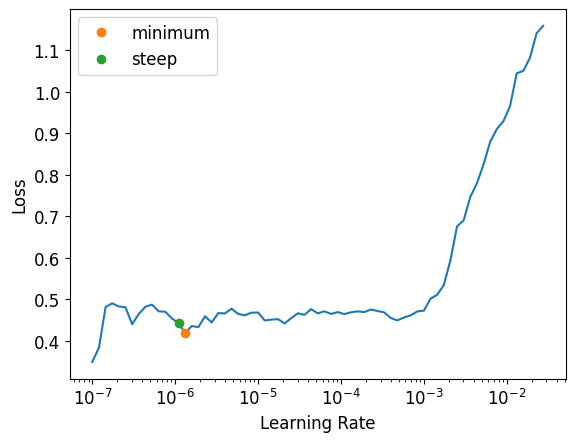

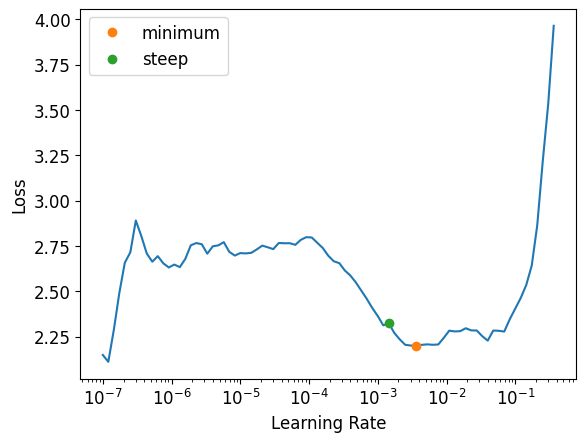

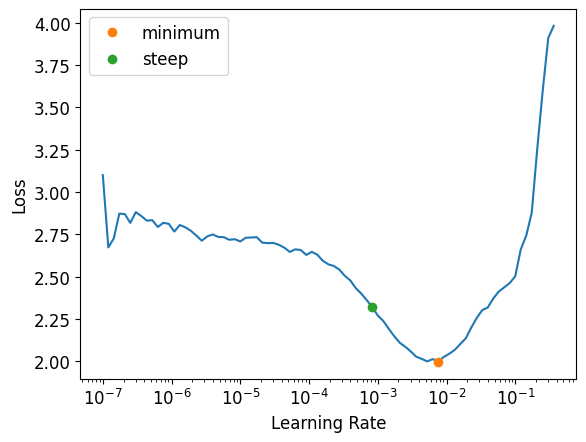

In [ ]:
learn_resnet.dls = dls
learn_vgg.dls = dls
learn_effnet.dls = dls #GPT 手動指定 .dls 給從 .pkl 載入的 learn_xxx： 參考GPT
learn_resnet.unfreeze()
lr_min,lr_steep = learn_resnet.lr_find(suggest_funcs=(minimum, steep))
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

learn_vgg.unfreeze()
lr_min,lr_steep = learn_vgg.lr_find(suggest_funcs=(minimum, steep))
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

learn_effnet.unfreeze()
lr_min,lr_steep = learn_effnet.lr_find(suggest_funcs=(minimum, steep))
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn_resnet.fit_one_cycle(6, lr_max= 2.75e-04)
learn_vgg.fit_one_cycle(6, lr_max= 2.75e-04)
learn_effnet.fit_one_cycle(6, lr_max= 2.75e-04)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.592848,0.280375,0.907563,0.092437,00:26
1,0.565643,0.948512,0.815126,0.184874,00:19
2,0.555739,0.210604,0.932773,0.067227,00:19
3,0.479748,0.208750,0.941176,0.058824,00:20
4,0.380472,0.117490,0.974790,0.025210,00:19
5,0.287971,0.117247,0.966387,0.033613,00:20


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.051350,0.750757,0.705882,0.294118,00:21
1,1.150797,0.328230,0.907563,0.092437,00:21
2,0.867945,0.264836,0.941176,0.058824,00:20
3,0.657455,0.241064,0.924370,0.075630,00:21
4,0.515363,0.193722,0.957983,0.042017,00:20
5,0.385775,0.183747,0.949580,0.050420,00:21


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.198338,0.884157,0.689076,0.310924,00:19
1,1.363608,0.389149,0.873950,0.126050,00:20
2,0.952083,0.240262,0.941176,0.058824,00:19
3,0.666064,0.185817,0.941176,0.058824,00:21
4,0.516988,0.167682,0.949580,0.050420,00:19
5,0.428556,0.187123,0.941176,0.058824,00:21


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

In [ ]:
myModel = myPath + '/resnet34_stage-2'
learn_resnet.save(myModel)                          # 存權重
learn_resnet.export(myModel + '.pkl')

myModel = myPath + '/vggstage-2'
learn_vgg.save(myModel)
learn_vgg.export(myModel + '.pkl')

myModel = myPath + '/effnetstage-2'
learn_effnet.save(myModel)
learn_effnet.export(myModel + '.pkl')


In [ ]:
learn_resnet = load_learner(f'{myPath}/resnet34_stage-2.pkl')
learn_vgg = load_learner(f'{myPath}/vggstage-2.pkl')
learn_effnet = load_learner(f'{myPath}/effnetstage-2.pkl')


In [ ]:
learn_resnet.dls = dls
learn_vgg.dls = dls
learn_effnet.dls = dls  #.pkl 載入模型的時候，dls 不一定會自動附上來

##confunsion matrix (test)

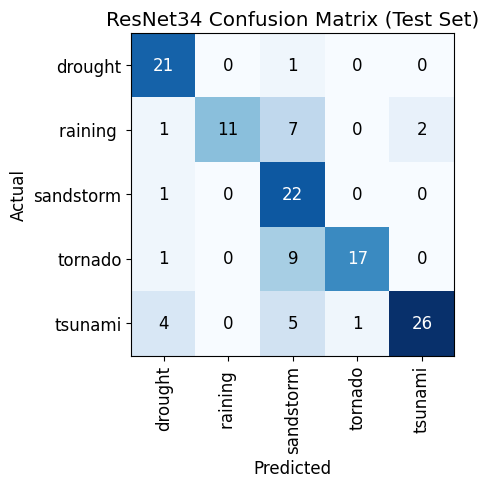

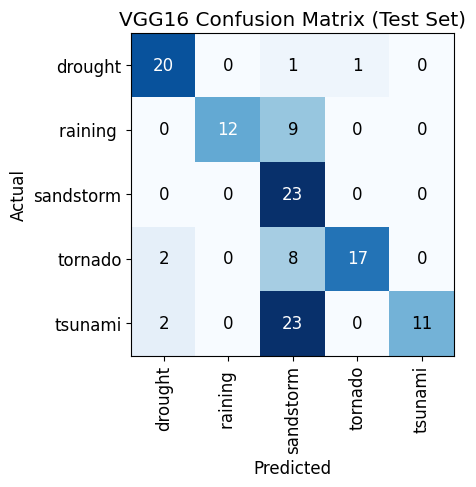

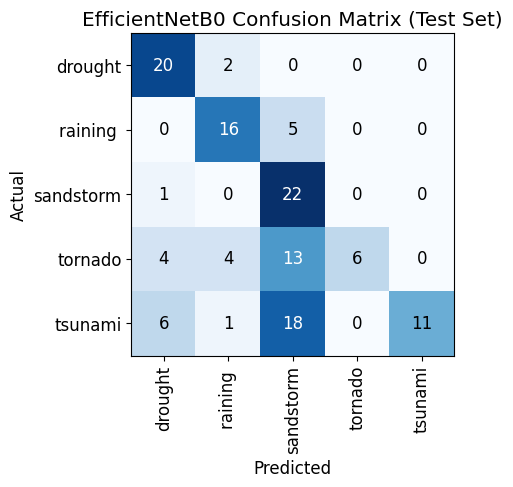

In [ ]:


interp_resnet = ClassificationInterpretation.from_learner(learn_resnet, dl=test_dl)
interp_resnet.plot_confusion_matrix(title='ResNet34 Confusion Matrix (Test Set)')

interp_vgg = ClassificationInterpretation.from_learner(learn_vgg, dl=test_dl)
interp_vgg.plot_confusion_matrix(title='VGG16 Confusion Matrix (Test Set)')

interp_effnet = ClassificationInterpretation.from_learner(learn_effnet, dl=test_dl)
interp_effnet.plot_confusion_matrix(title='EfficientNetB0 Confusion Matrix (Test Set)')
